Simple Stock Analysis
Stock analysis is the evaluation or examination of the stock market. There are many trading tools to use to analysis stocks such as fundamental and technical analysis. Fundamental analysis is more focused on data from the financial statements, economic reports, and company assets. Technical analysis is based on the study of the past of historical price to predict the future price movement. However, this tutorial is not to get rich quick. Therefore, do not use your money to trade based on this stock analysis. Please do not use this method to invest with your money and I am not responsible for you loss.

Simple stock is a basic stock analysis tutorial. There are 7 parts in this tutorial.

1.Import Libraries
2.Get data from Yahoo
3.Analysis Data
4.Understand the Data based on Statistics
5.Calculate Prices
6.Plot Charts
7.Calculate Holding Period Return

1. Import Libraries

In [1]:
 # Libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

ModuleNotFoundError: No module named 'pandas_datareader'

In [5]:
# Libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

ModuleNotFoundError: No module named 'fix_yahoo_finance'

Fixing error due to fix_yahoo_finance to import dataset

In [9]:
# Libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
 
import yfinance as yf
yf.pdr_override()

2. Get Data from Yahoo!

This section we will pull the data from the website in Yahoo. We will be using the company of Apple and the symbol is 'AAPL'. Also, we will have a starting date and ending date.

In [14]:
stock = 'AAPL'
start = '2016-01-01' 
end = '2022-10-10'
df = pdr.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [15]:
df.head() # the first 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00-05:00,25.652500,26.342501,25.500000,26.337500,24.151493,270597600
2016-01-05 00:00:00-05:00,26.437500,26.462500,25.602501,25.677500,23.546274,223164000
2016-01-06 00:00:00-05:00,25.139999,25.592501,24.967501,25.174999,23.085478,273829600
2016-01-07 00:00:00-05:00,24.670000,25.032499,24.107500,24.112499,22.111170,324377600
2016-01-08 00:00:00-05:00,24.637501,24.777500,24.190001,24.240000,22.228092,283192000


In [16]:
df.shape # (rows, columns)

(1704, 6)

In [17]:
df.columns # Shows names of columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [18]:
df.dtypes # Shows data types

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [19]:
df.info() # Shows information about DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1704 entries, 2016-01-04 00:00:00-05:00 to 2022-10-07 00:00:00-04:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1704 non-null   float64
 1   High       1704 non-null   float64
 2   Low        1704 non-null   float64
 3   Close      1704 non-null   float64
 4   Adj Close  1704 non-null   float64
 5   Volume     1704 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 157.7 KB


In [20]:
df.describe() # Shows summary statistics based on stock data 

,Open,High,Low,Close,Adj Close,Volume
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1.704000e+03
mean,76.966598,77.846343,76.131862,77.026502,75.619135,1.222373e+08
std,48.735672,49.373909,48.103404,48.759438,49.237353,5.790167e+07
min,22.500000,22.917500,22.367500,22.584999,20.949608,4.100000e+07
25%,38.949375,39.190001,38.523750,38.886251,37.005644,8.441490e+07
50%,52.316250,52.576250,51.788750,52.218750,50.702124,1.067262e+08
75%,125.602499,126.990623,124.162498,125.641874,124.490156,1.422226e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,5.334788e+08


4. Understand the Data based on Statistics

We will be using "Adj. Closing" price to find the minimum, maximum, average and standard deviation prices. The reason we are using "Adj. Closing" because is mostly use for historical returns. Also, the Adjusting Prices is change where the stock was accounts for the dividend and splits. However, the "Closing" price was not including with dividend and splits.

In [21]:
# Use only Adj. Closing
# Find the minimum
df['Adj Close'].min()

20.949607849121094

In [22]:
# Find the maximum
df['Adj Close'].max()

181.25991821289062

In [23]:
# Find the standard deviation
df['Adj Close'].std()

49.23735313018952

V. Calculate the Prices

This section, we will be calculating the daily returns, log returns, and other technical indicators such as RSI(Relative Strength Index), MA(Moving Average), SMA(Simple Moving Averga), EMA(Exponential Moving Average), and VWAP(Voume Weighted Average Price). Also, we will calculate drawdowns.

In [24]:
# Daily Returns
# Formula: (Today Price / Yesterday Price) - 1 
df['Daily_Returns'] = df['Adj Close'].shift(1) / df['Adj Close']  - 1
df['Daily_Returns'].head()

Date
2016-01-04 00:00:00-05:00         NaN
2016-01-05 00:00:00-05:00    0.025703
2016-01-06 00:00:00-05:00    0.019960
2016-01-07 00:00:00-05:00    0.044064
2016-01-08 00:00:00-05:00   -0.005260
Name: Daily_Returns, dtype: float64

In [25]:
# Another way of calculating Daily Returns in simple way
DR = df['Adj Close'].pct_change(1) # 1 is for "One Day" in the past
DR.head()

Date
2016-01-04 00:00:00-05:00         NaN
2016-01-05 00:00:00-05:00   -0.025059
2016-01-06 00:00:00-05:00   -0.019570
2016-01-07 00:00:00-05:00   -0.042204
2016-01-08 00:00:00-05:00    0.005288
Name: Adj Close, dtype: float64

In [26]:
# Log Returns
# Formula: log(Today Price/ Yesterday Price)
df['Log_Returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))

In this part of this section, we will be using the library of technical analysis. This packages has many different types of technical indicators. However, it does not have every single technical indicators. We do not need to do calculation since the library has done it for us. https://mrjbq7.github.io/ta-lib/doc_index.html

In [28]:
import talib as ta

# Creating Indicators
n=30 # number of periods

# RSI(Relative Strength Index)
# RSI is technical analysis indicator
# https://www.investopedia.com/terms/r/rsi.asp
df['RSI']=ta.RSI(np.array(df['Adj Close'].shift(1)), timeperiod=n)

# MA(Moving Average)
# https://www.investopedia.com/terms/m/movingaverage.asp
df['MA']=ta.MA(np.array(df['Adj Close'].shift(1)), timeperiod=n, matype=0)

# SMA(Simple Moving Average)
# https://www.investopedia.com/terms/s/sma.asp
df['SMA']=ta.SMA(np.array(df['Adj Close'].shift(1)))

# EMA(Exponential Moving Average)
# https://www.investopedia.com/terms/e/ema.asp
df['EMA']=ta.EMA(np.array(df['Adj Close'].shift(1)), timeperiod=n)

In [29]:
# Volume Weighted Average Price - VWAP
# http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:vwap_intraday
df['VWAP'] = round(np.cumsum(df['Volume']*(df['High']+df['Low'])/2) / np.cumsum(df['Volume']), 2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Log_Returns,RSI,MA,SMA,EMA,VWAP
Date,,,,,,,,,,,,,
2016-01-04 00:00:00-05:00,25.652500,26.342501,25.500000,26.337500,24.151493,270597600,NaN,NaN,NaN,NaN,NaN,NaN,25.92
2016-01-05 00:00:00-05:00,26.437500,26.462500,25.602501,25.677500,23.546274,223164000,0.025703,-0.025379,NaN,NaN,NaN,NaN,25.97
2016-01-06 00:00:00-05:00,25.139999,25.592501,24.967501,25.174999,23.085478,273829600,0.019960,-0.019764,NaN,NaN,NaN,NaN,25.72
2016-01-07 00:00:00-05:00,24.670000,25.032499,24.107500,24.112499,22.111170,324377600,0.044064,-0.043121,NaN,NaN,NaN,NaN,25.38
2016-01-08 00:00:00-05:00,24.637501,24.777500,24.190001,24.240000,22.228092,283192000,-0.005260,0.005274,NaN,NaN,NaN,NaN,25.20


In [30]:
# Drawdown
# Drawdown shows the decline price since the stock began trading
# https://www.investopedia.com/terms/d/drawdown.asp
# There are 252 trading day in a year
window = 252

# Calculate the maximum drawdown
# Use the min_period of 1 (1 is the least valid observations) for the first 252 day in the data
Maximum_Drawdown = df['Adj Close'].rolling(window, min_periods=1).max()
Daily_Drawdown = df['Adj Close']/Maximum_Drawdown - 1.0

# Calculate the negative drawdown
Negative_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

In [ ]:
6. Plot Charts

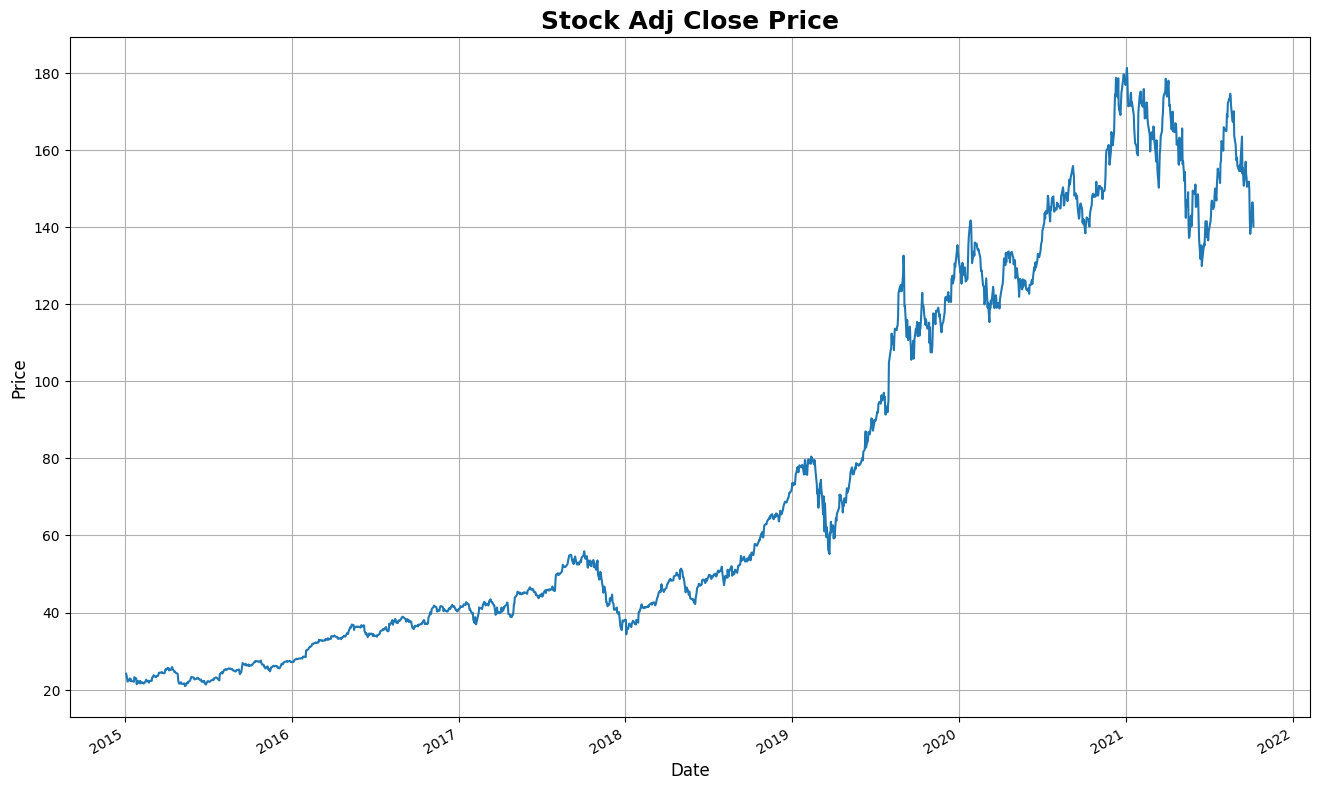

In [31]:
# Plot Simple Line Chart
# Plot Adj Close

plt.figure(figsize=(16,10))
df['Adj Close'].plot(grid=True)
plt.title("Stock Adj Close Price", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.show()

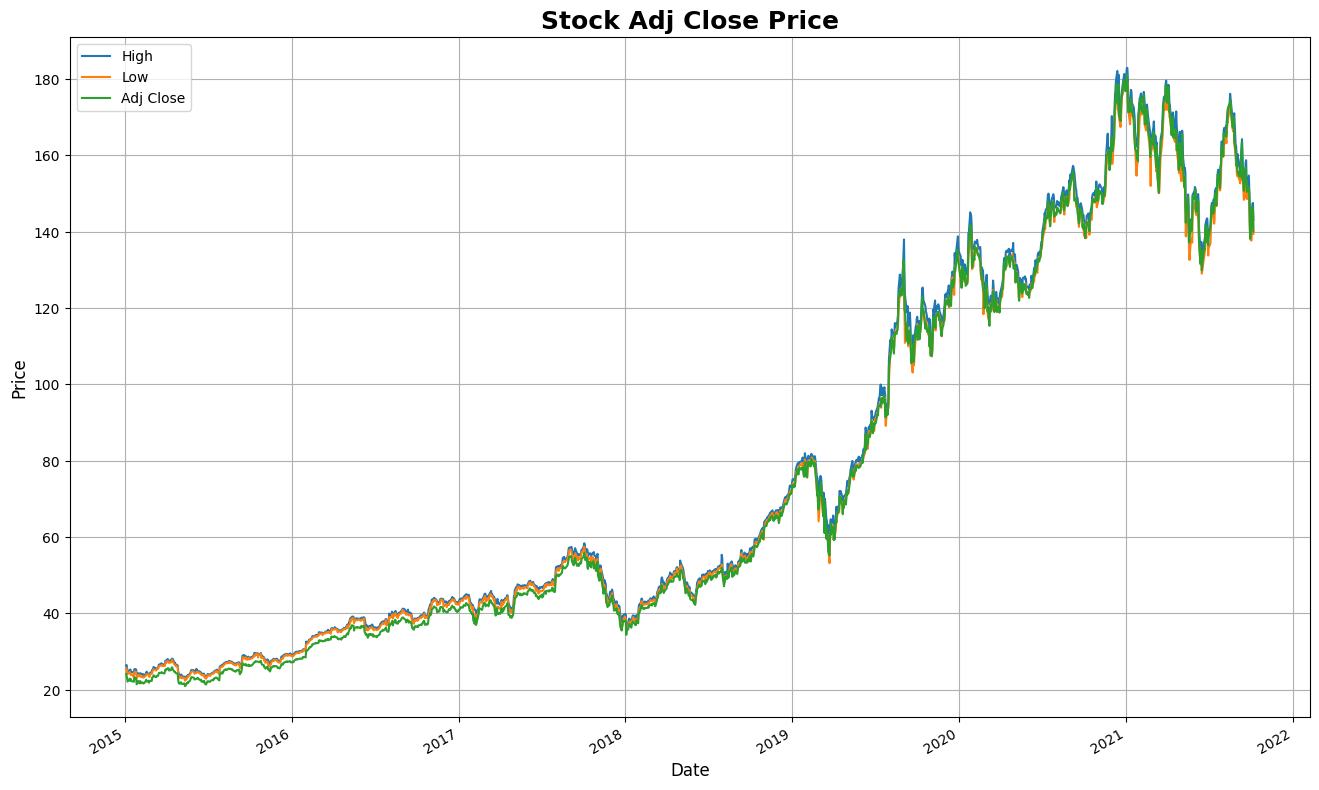

In [32]:
# Plot High, Low, Adj Close
df[['High', 'Low', 'Adj Close']].plot(figsize=(16,10), grid=True)
plt.title("Stock Adj Close Price", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

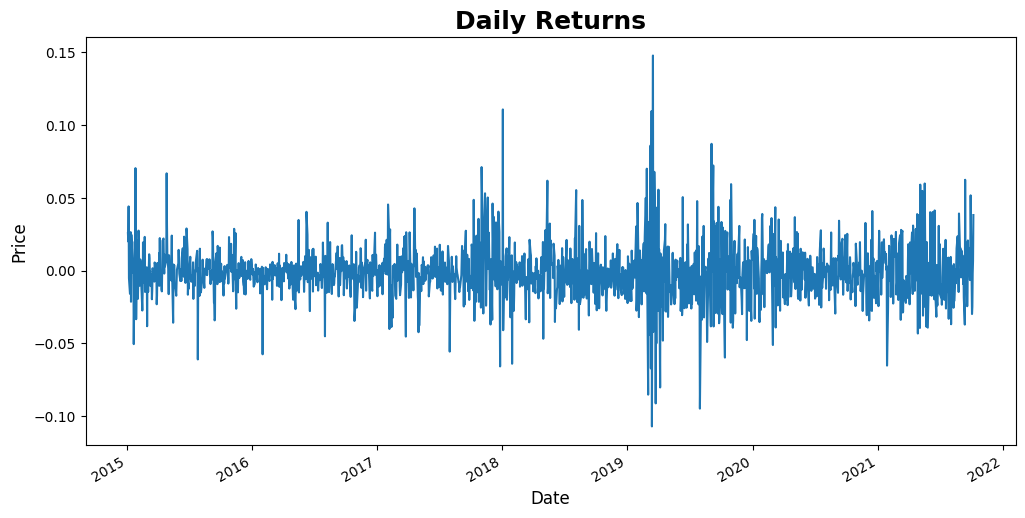

In [33]:
# Plot Daily Returns
df['Daily_Returns'].plot(figsize=(12,6))
plt.title("Daily Returns",fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

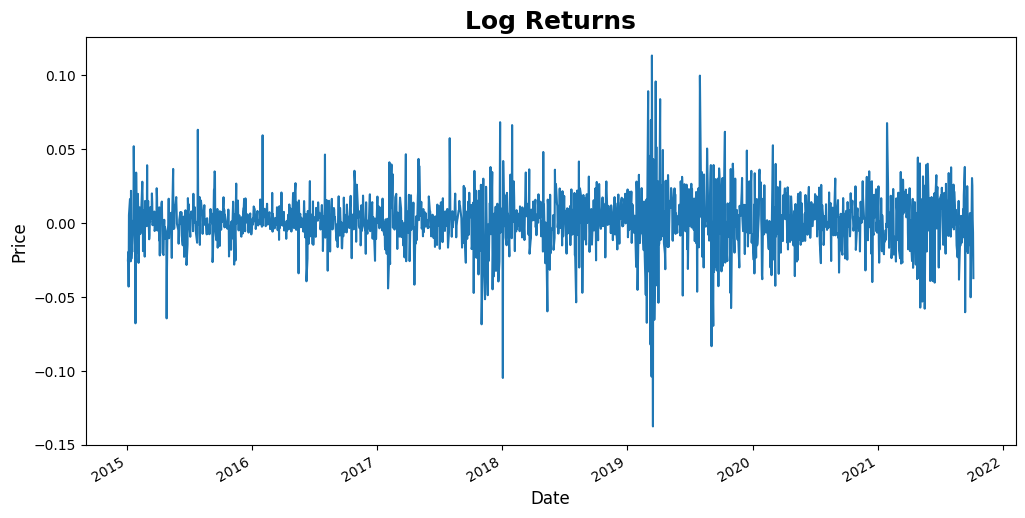

In [34]:
# Plot Log Returns
df['Log_Returns'].plot(figsize=(12,6))
plt.title("Log Returns", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

7. Holding Period Return(HPR)

Holding period return (HPR) is the rate of return on an individual stocks or portfolio over the whole period during the time it was held and it a measurement of investment performance.

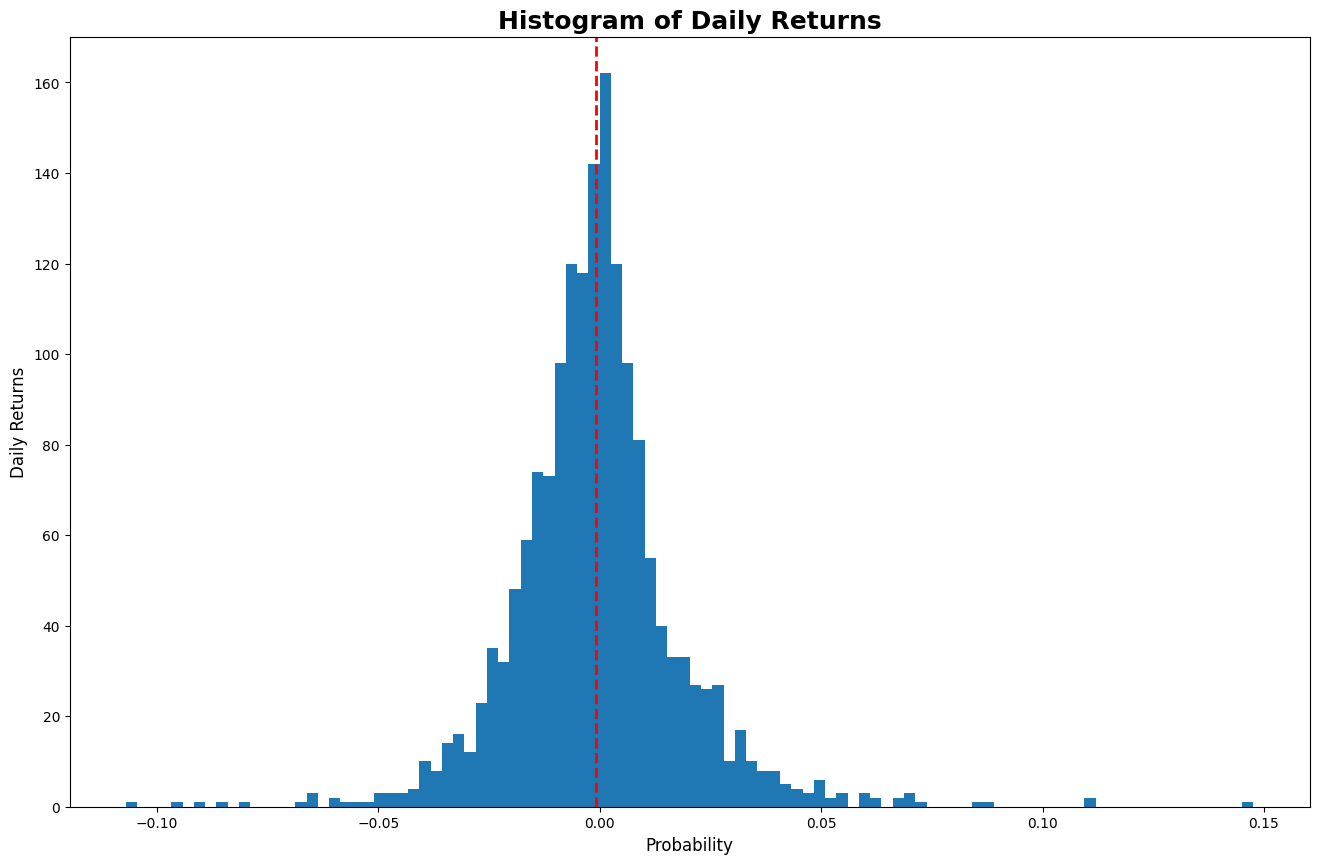

In [35]:
# Histogram of Daily Returns
# Histogram is distribution of numerical data and has a rectangle whose area is prportional to the frequency of a variable. 
plt.figure(figsize=(16,10))
plt.hist(df['Daily_Returns'].dropna(), bins=100, label='Daily Returns data') # Drop NaN
plt.title("Histogram of Daily Returns", fontsize=18, fontweight='bold')
plt.axvline(df['Daily_Returns'].mean(), color='r', linestyle='dashed', linewidth=2) # Shows the average line
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Daily Returns", fontsize=12)
plt.show()

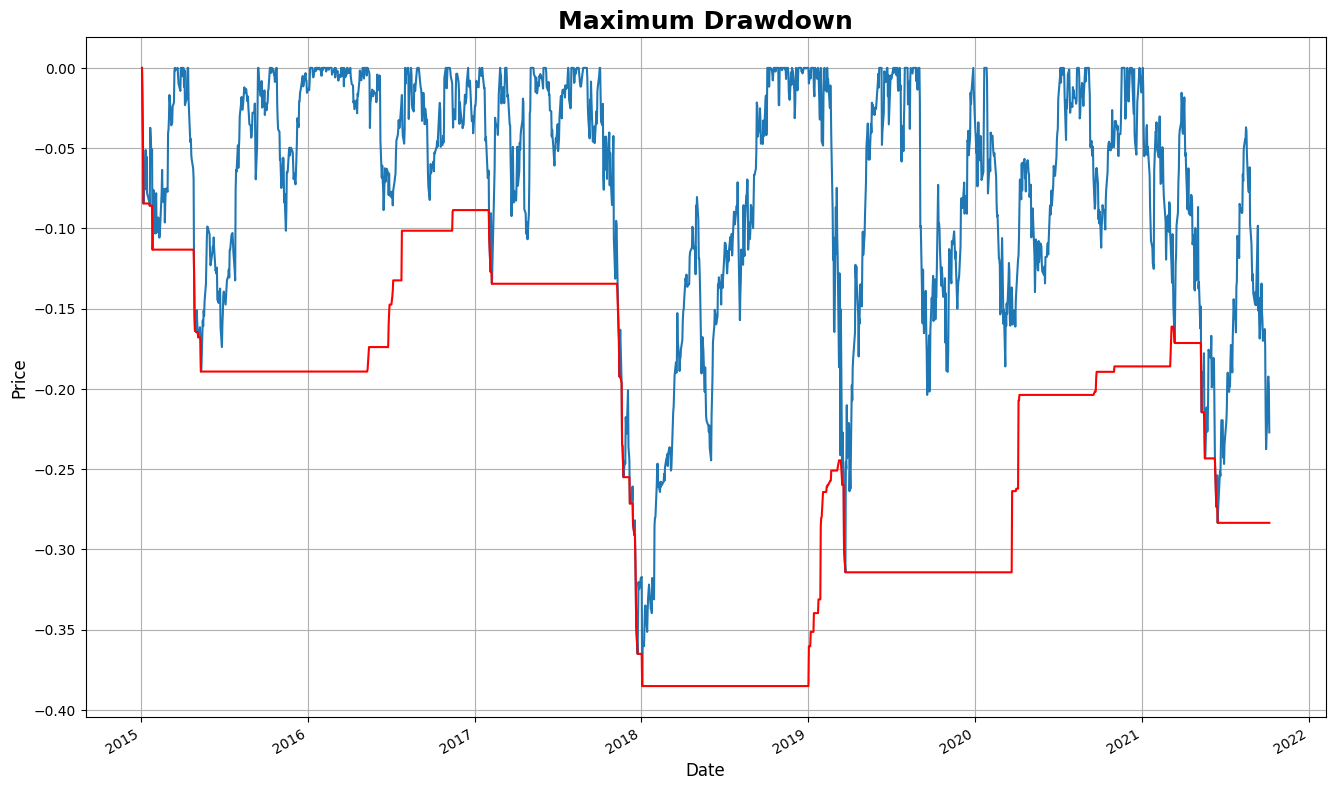

In [36]:
# Plot Drawdown
plt.figure(figsize=(16,10))
Daily_Drawdown.plot()
Negative_Drawdown.plot(color='r',grid=True) 
plt.title("Maximum Drawdown", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

In [40]:
# https://www.investopedia.com/exam-guide/series-65/quantitative-methods/holding-period-return.asp
# Formula: (Ending Value of Investment + Dividend - Beginning Value of Investment) / Beginning Value of Investment
# To get dividend in Yahoo!
DIV = pdr.get_data_yahoo(stock, start, end, actions='only')

[*********************100%***********************]  1 of 1 completed


In [42]:
# See how much dividends and splits was given during the time period
DIV

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2016-01-04 00:00:00-05:00,25.652500,26.342501,25.500000,26.337500,24.151499,270597600,0.0,0.0
2016-01-05 00:00:00-05:00,26.437500,26.462500,25.602501,25.677500,23.546272,223164000,0.0,0.0
2016-01-06 00:00:00-05:00,25.139999,25.592501,24.967501,25.174999,23.085485,273829600,0.0,0.0
2016-01-07 00:00:00-05:00,24.670000,25.032499,24.107500,24.112499,22.111168,324377600,0.0,0.0
2016-01-08 00:00:00-05:00,24.637501,24.777500,24.190001,24.240000,22.228092,283192000,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-03 00:00:00-04:00,138.210007,143.070007,137.690002,142.449997,142.449997,114311700,0.0,0.0
2022-10-04 00:00:00-04:00,145.029999,146.220001,144.259995,146.100006,146.100006,87830100,0.0,0.0
2022-10-05 00:00:00-04:00,144.070007,147.380005,143.009995,146.399994,146.399994,79471000,0.0,0.0


In [44]:
# Add all the dividend
Total_Dividend = DIV['Dividends'].sum()
Total_Dividend

4.989999999999999

In [45]:
# You invest beginning 2015 and sold it end of 2022
HPR = (df['Adj Close'][502] + Total_Dividend - df['Adj Close'][0]) / df['Adj Close'][0]
HPR

0.8751190435763128

In [46]:
# You can use round for 4 decimal points
print('Holding Period Return: ', str(round(HPR,4)*100)+"%")

Holding Period Return:  87.51%


We going to pick another stocks that is Microsoft and we will compare it to Apple.

In [47]:
MSFT =  pdr.get_data_yahoo('MSFT', start, end)['Adj Close'] # Use Adj Close only
MSFT_DIV = pdr.get_data_yahoo('MSFT', start, end, actions='only')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [48]:
MSFT.head() # Shows only Date and Adj Close

Date
2016-01-04 00:00:00-05:00    49.269142
2016-01-05 00:00:00-05:00    49.493919
2016-01-06 00:00:00-05:00    48.594841
2016-01-07 00:00:00-05:00    46.904587
2016-01-08 00:00:00-05:00    47.048454
Name: Adj Close, dtype: float64

In [49]:
MSFT_DIV # Shows how much dividend was given

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2016-01-04 00:00:00-05:00,54.320000,54.799999,53.389999,54.799999,49.269146,53778000,0.0,0
2016-01-05 00:00:00-05:00,54.930000,55.389999,54.540001,55.049999,49.493916,34079700,0.0,0
2016-01-06 00:00:00-05:00,54.320000,54.400002,53.639999,54.049999,48.594837,39518900,0.0,0
2016-01-07 00:00:00-05:00,52.700001,53.490002,52.070000,52.169998,46.904594,56564900,0.0,0
2016-01-08 00:00:00-05:00,52.369999,53.279999,52.150002,52.330002,47.048450,48754000,0.0,0
...,...,...,...,...,...,...,...,...
2022-10-03 00:00:00-04:00,235.410004,241.610001,234.660004,240.740005,240.740005,28880400,0.0,0
2022-10-04 00:00:00-04:00,245.089996,250.360001,244.979996,248.880005,248.880005,34888400,0.0,0
2022-10-05 00:00:00-04:00,245.990005,250.580002,244.100006,249.199997,249.199997,20347100,0.0,0


In [50]:
MSFT_Dividend = MSFT_DIV['Dividends'].sum()
MSFT_Dividend

12.920000000000002

In [51]:
# You invest beginning 2015 and sold it end of 2022
MSFT_HPR = (MSFT[502] + Total_Dividend - MSFT[0]) / MSFT[0]
MSFT_HPR

0.7408728321774968

In [52]:
# You can use round for 4 decimal points
print('Apple Holding Period Return: ', str(round(HPR,4)*100)+"%")
print('Microsoft Holding Period Return: ', str(round(MSFT_HPR,4)*100)+"%")

Apple Holding Period Return:  87.51%
Microsoft Holding Period Return:  74.09%


In the conclusion, we use 2 stocks to compare holding period return. Therefore, Apple had higher holding period return than Microsoft. Therefore, I would invest in Apple based on the stock analysis. However, if you comparing 2 stocks or 2 portfolio. You would pick the ones with the highest rate of return.